In [17]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns

#set the max columns to none
pd.set_option('display.max_columns', None)

In [10]:
size = 'demo'
type_ = 'validation'
#Import train Data
history_train_path = f'./files/parquet/ebnerd_{size}/{type_}/history.parquet'

history_df = pd.read_parquet(history_train_path)
print(history_df.shape)

behaviors_path = f'./files/parquet/ebnerd_{size}/{type_}/behaviors.parquet'
behaviors_df = pd.read_parquet(behaviors_path)
print(f'Raw {size} validation behaviors df shape:          ',behaviors_df.shape)


(1562, 5)
Raw demo validation behaviors df shape:           (25356, 17)


### History

In [11]:
history_df.head()

,user_id,impression_time_fixed,scroll_percentage_fixed,article_id_fixed,read_time_fixed
0,750497,"[2023-05-04T09:42:39.000000, 2023-05-04T09:43:...","[100.0, 65.0, 100.0, 100.0, 100.0, 100.0, 100....","[9749224, 9749156, 9749224, 9748948, 9748980, ...","[49.0, 5.0, 7.0, 151.0, 214.0, 199.0, 22.0, 64..."
1,22779,"[2023-05-04T07:53:42.000000, 2023-05-04T15:59:...","[52.0, 39.0, 62.0, 38.0, 74.0, 19.0, 30.0, 56....","[9749025, 9750090, 9750015, 9750161, 9745750, ...","[4.0, 16.0, 2.0, 9.0, 40.0, 7.0, 9.0, 8.0, 18...."
2,373598,"[2023-05-04T07:51:58.000000, 2023-05-04T09:59:...","[nan, nan, nan, 59.0, 33.0, 75.0, nan, nan, 76...","[9514481, 9514481, 9111040, 9750389, 9750307, ...","[0.0, 0.0, 0.0, 3.0, 9.0, 117.0, 39.0, 0.0, 8...."
3,383378,"[2023-05-04T07:27:57.000000, 2023-05-04T07:29:...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[9747490, 9749036, 9749025, 9748792, 9748592, ...","[85.0, 18.0, 133.0, 191.0, 331.0, 56.0, 43.0, ..."
4,411733,"[2023-05-04T17:09:09.000000, 2023-05-04T17:09:...","[20.0, 14.0, 61.0, 55.0, 21.0, 81.0, 100.0, 10...","[9750081, 9750111, 9750039, 9749948, 9749729, ...","[2.0, 4.0, 6.0, 9.0, 1.0, 30.0, 37.0, 5.0, 3.0..."


In [12]:
history_df_copied= history_df[['article_id_fixed','read_time_fixed']].copy()

In [15]:
history_exploded = history_df_copied.explode('read_time_fixed')
history_exploded.head()

,article_id_fixed,read_time_fixed
0,"[9749224, 9749156, 9749224, 9748948, 9748980, ...",49.0
0,"[9749224, 9749156, 9749224, 9748948, 9748980, ...",5.0
0,"[9749224, 9749156, 9749224, 9748948, 9748980, ...",7.0
0,"[9749224, 9749156, 9749224, 9748948, 9748980, ...",151.0
0,"[9749224, 9749156, 9749224, 9748948, 9748980, ...",214.0


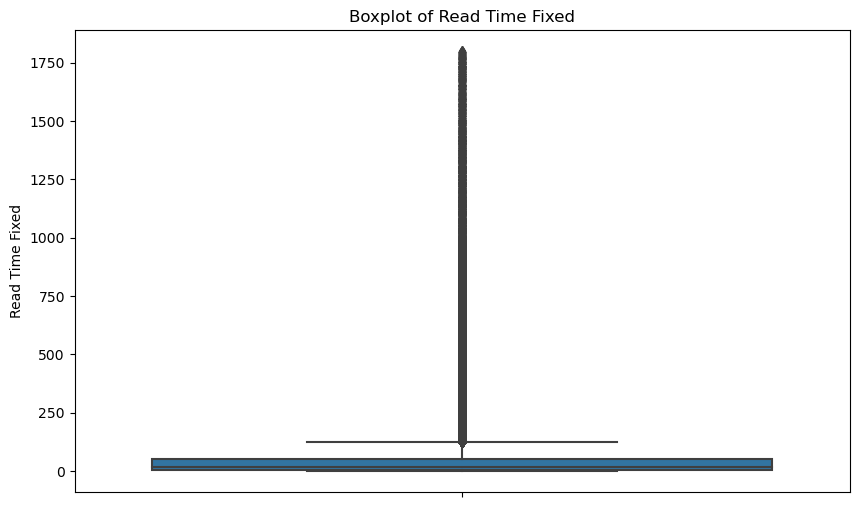

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=history_exploded['read_time_fixed'])

# Add titles and labels
plt.title('Boxplot of Read Time Fixed')
plt.ylabel('Read Time Fixed')

# Display the plot
plt.show()

Text(0, 0.5, 'Frequency')

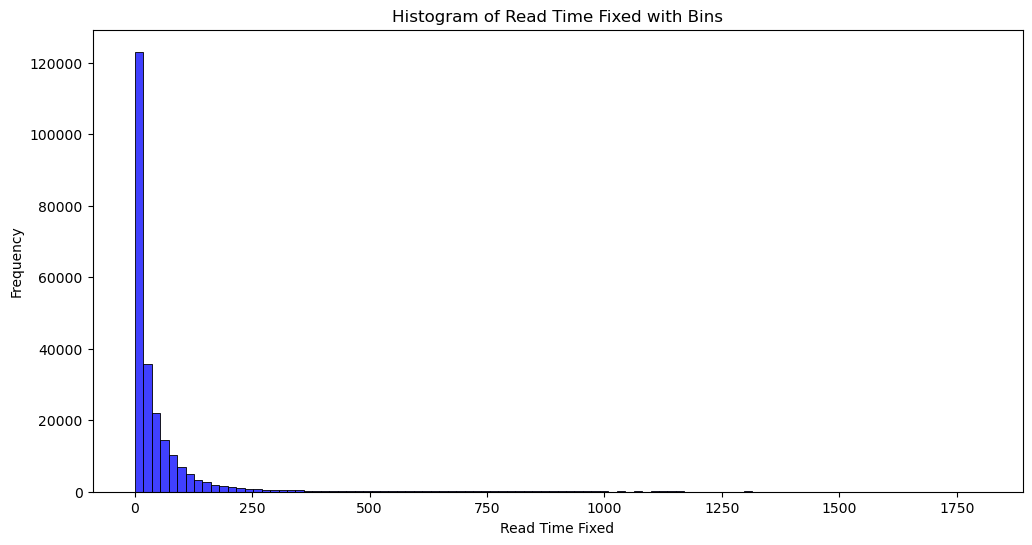

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(history_exploded['read_time_fixed'], bins=100, kde=False, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Read Time Fixed with Bins')
plt.xlabel('Read Time Fixed')
plt.ylabel('Frequency')

In [23]:
history_exploded.columns

Index(['article_id_fixed', 'read_time_fixed'], dtype='object')

In [24]:

# Calculate mean and standard deviation of column C
mean_C = history_exploded['read_time_fixed'].mean()
std_C = history_exploded['read_time_fixed'].std()

# Define a threshold for deviation (e.g., 2 times the standard deviation)
threshold = mean_C + 2 * std_C

# Filter the DataFrame based on deviation from the mean of column C
filtered_df = history_exploded[history_exploded['read_time_fixed'] > threshold]

print("Original DataFrame:")
print("\nFiltered DataFrame based on deviation from mean of column C:")
print(filtered_df.head())

Original DataFrame:

Filtered DataFrame based on deviation from mean of column C:
                                    article_id_fixed read_time_fixed
0  [9749224, 9749156, 9749224, 9748948, 9748980, ...           500.0
0  [9749224, 9749156, 9749224, 9748948, 9748980, ...           504.0
0  [9749224, 9749156, 9749224, 9748948, 9748980, ...           498.0
0  [9749224, 9749156, 9749224, 9748948, 9748980, ...           996.0
0  [9749224, 9749156, 9749224, 9748948, 9748980, ...           937.0


In [33]:
mean_C = history_exploded['read_time_fixed'].mean()
std_C = history_exploded['read_time_fixed'].std()
min_C = history_exploded['read_time_fixed'].min()
max_C = history_exploded['read_time_fixed'].max()


history_exploded['read_time_fixed_normalized'] = history_exploded['read_time_fixed'].apply(lambda x: (x-min_C)/(max_C-min_C))
history_exploded.head()

,article_id_fixed,read_time_fixed,read_time_fixed_standardized,read_time_fixed_normalized
0,"[9749224, 9749156, 9749224, 9748948, 9748980, ...",49.0,-0.078362,0.027222
0,"[9749224, 9749156, 9749224, 9748948, 9748980, ...",5.0,-0.347609,0.002778
0,"[9749224, 9749156, 9749224, 9748948, 9748980, ...",7.0,-0.335370,0.003889
0,"[9749224, 9749156, 9749224, 9748948, 9748980, ...",151.0,0.545799,0.083889
0,"[9749224, 9749156, 9749224, 9748948, 9748980, ...",214.0,0.931310,0.118889


Text(0, 0.5, 'Frequency')

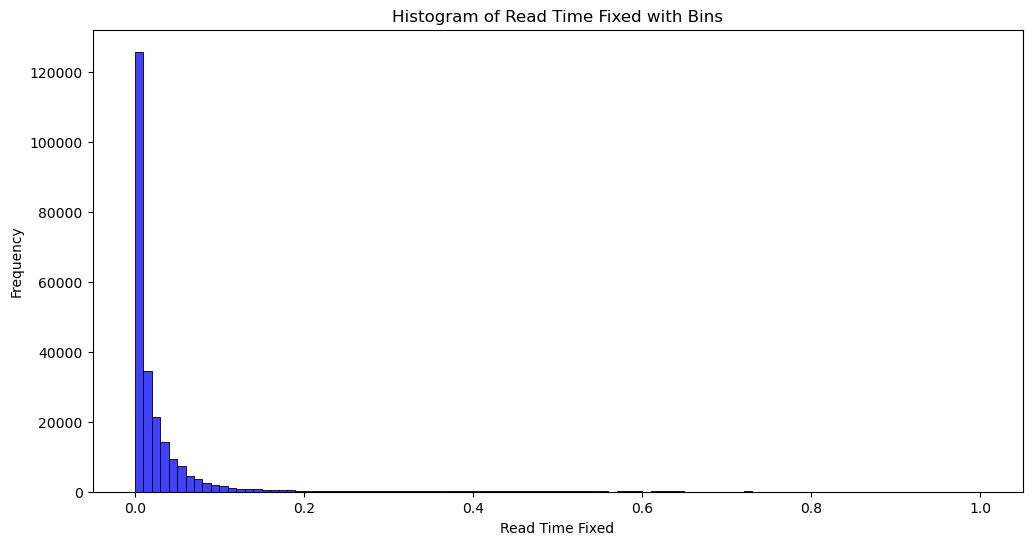

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(history_exploded['read_time_fixed_normalized'], bins=100, kde=False, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Read Time Fixed with Bins')
plt.xlabel('Read Time Fixed')
plt.ylabel('Frequency')

In [ ]:
median_D = df['D'].sta()
Q1 = df['D'].quantile(0.25)
Q3 = df['D'].quantile(0.75)
IQR_D = Q3 - Q1
